# 1. Get loudness, tempo, meter from each song

In [1]:
import tables


def open_h5_file_read(h5filename):

    return tables.open_file(h5filename, mode='r')


def get_loudness(h5, songidx=0):

    return h5.root.analysis.songs.cols.loudness[songidx]


def get_tempo(h5, songidx=0):

    return h5.root.analysis.songs.cols.tempo[songidx]


def get_bars_start(h5, songidx=0):

    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.bars_start[h5.root.analysis.songs.cols.idx_bars_start[songidx]:]
    return h5.root.analysis.bars_start[h5.root.analysis.songs.cols.idx_bars_start[songidx]:
                                       h5.root.analysis.songs.cols.idx_bars_start[songidx + 1]]


def get_beats_start(h5, songidx=0):

    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.beats_start[h5.root.analysis.songs.cols.idx_beats_start[songidx]:]
    return h5.root.analysis.beats_start[h5.root.analysis.songs.cols.idx_beats_start[songidx]:
                                        h5.root.analysis.songs.cols.idx_beats_start[songidx + 1]]


def get_meter(h5, sonidx=0):

    beats = get_beats_start(h5)
    bar = get_bars_start(h5)
    try:
        meter = int(beats.shape[0] / bar.shape[0])
    except:
        meter = None
    return meter

# 2. Generate data for all songs

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
A_pkg = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
B_pkg = 'ABCDEFGHI'
pkg = A_pkg

In [ ]:
directory = '/Users/Chenjiayue/Desktop/Capstone_Project/MillionSongSubset/data/A'
data = []
for second_dir in os.listdir(directory):
    if second_dir in pkg:
        second_name = directory +'/'+ second_dir
        for third_dir in os.listdir(second_name):
            if third_dir in pkg:
                third_name = second_name + '/' + third_dir
                for song in os.listdir(third_name):
                    h5 = open_h5_file_read(third_name + '/' + song)
                    loudness = get_loudness(h5, songidx=0)
                    tempo = get_tempo(h5, songidx=0)
                    meter = get_meter(h5, sonidx=0)
                    h5.close()
                    data.append([loudness, tempo, meter])

In [ ]:
directory = '/Users/Chenjiayue/Desktop/Capstone_Project/MillionSongSubset/data/B'

data1 = []
for second_dir in os.listdir(directory):
    if second_dir in pkg:
        second_name = directory +'/'+ second_dir
        for third_dir in os.listdir(second_name):
            if third_dir in pkg:
                third_name = second_name + '/' + third_dir
                for song in os.listdir(third_name):
                    h5 = open_h5_file_read(third_name + '/' + song)
                    loudness = get_loudness(h5, songidx=0)
                    tempo = get_tempo(h5, songidx=0)
                    meter = get_meter(h5, sonidx=0)
                    h5.close()
                    data1.append([loudness, tempo, meter])

In [ ]:
df1 = pd.DataFrame(np.array(data), columns = ['loudness','tempo','meter'])
df2 = pd.DataFrame(np.array(data1), columns = ['loudness','tempo','meter'])

In [6]:
df = pd.concat([df1,df2])

In [14]:
df.to_csv('df.csv',  sep=',',header=False, index=False)

# 3. Perform K_means clustering

In [40]:
df = pd.read_csv('df.csv',header=None)
df.columns = ['loudness', 'tempo', 'meter']
df['tempo'].min()

0.0

In [13]:
X = df[['loudness','tempo']].values

In [14]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

#### 2-D (Loudness, Tempo)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

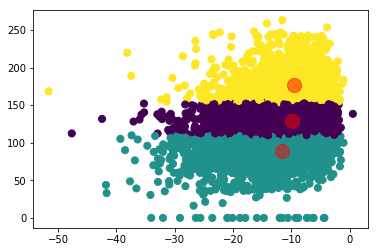

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)

#### 3-D(Loudness, Tempo, Meter)

In [17]:
from mpl_toolkits.mplot3d import Axes3D

In [42]:
df['meter'].fillna(0, inplace=True)

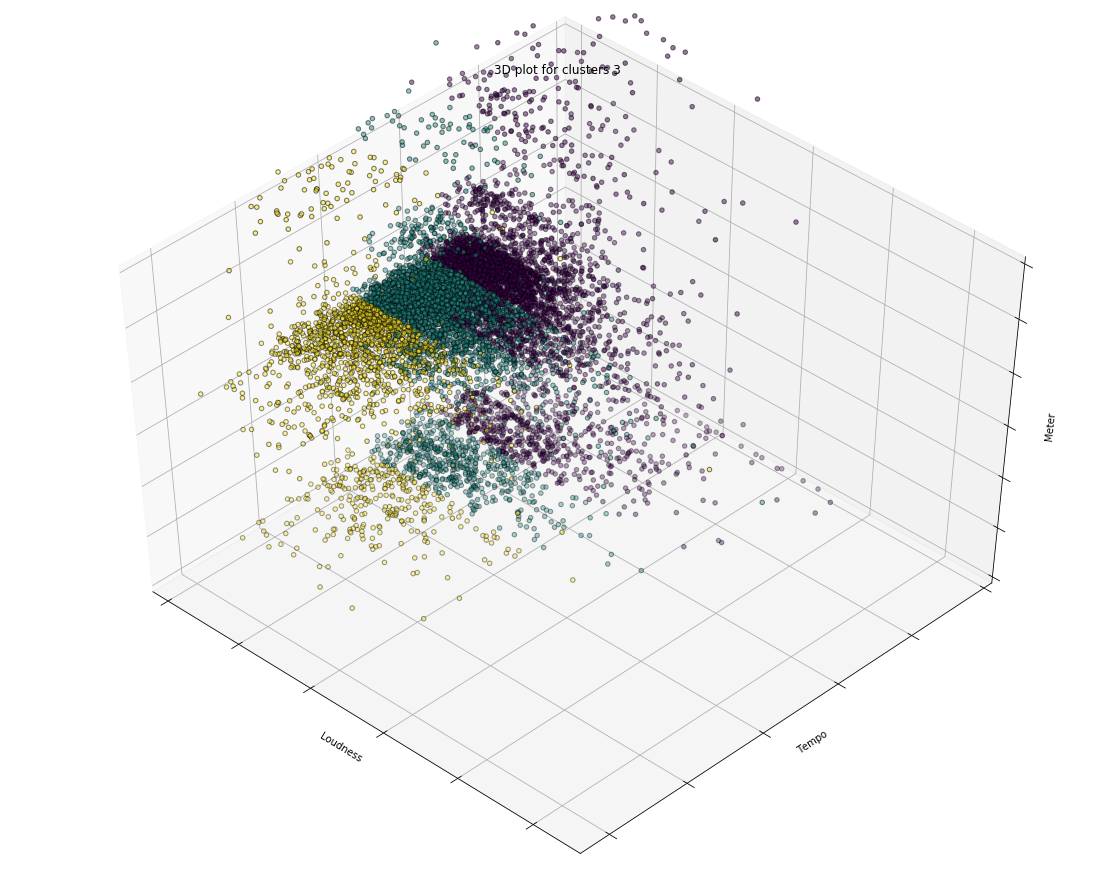

In [45]:
X = df.values

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_


fig = plt.figure(figsize=(16, 12))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Loudness')
ax.set_ylabel('Tempo')
ax.set_zlabel('Meter')
ax.set_title('3D plot for clusters 3')
ax.set_xlim3d(-55,1)
ax.set_ylim3d(0,263)
ax.set_zlim3d(0,6)
ax.dist = 10
